In [1]:
import shutil
import hashlib
import unittest
from pathlib import Path
from datetime import datetime
import joblib
from portfawn.portfolio import BackTest
from tests.utils import get_normal_param

%matplotlib inline

## Setting the Parameters
The first step to optimize portfolios is to set the configurations such as the list of tickers, backtesting periods, and sampling and optimization paramters.

In [2]:
# tickers
tickers = {"Global REIT": "REET", 
           "MSCI Emerging Markets": "EEM", 
           "Core S&P Total U.S. Stock Market": "ITOT",
           'Core U.S. Aggregate Bond': 'AGG'}

# date
start_date = datetime.strptime("2015-01-01", "%Y-%m-%d").date()
end_date = datetime.strptime("2020-12-31", "%Y-%m-%d").date()
training_days = 5 * 252
testing_days = 252

# market
risk_free_rate = 0.0

# portfolio
portfolio_fitness = {"MSR": "Max Sharpe-Ratio", 
                     "Equal": "Equal Weight", 
                     'MR': "Maximum Returns",
                     'MV': 'Minimum Volatility'}

optimization_params = {
    "scipy_params": {
        "maxiter": 1000,
        "disp": False,
        "ftol": 1e-10,
    },
    "target_return": 0.1,
    "target_risk": 0.1,
    "weight_bound": (0.05, 0.95),
}
sampling_params = {"type": "standard"}

# system
n_jobs = joblib.cpu_count() - 1

# backtest
backtesting_name = 'test'

# config
backtesting_config = {
    "backtesting_name": backtesting_name,
    "portfolio_fitness": portfolio_fitness,
    "tickers": tickers,
    "start_date": start_date,
    "end_date": end_date,
    "optimization_params": optimization_params,
    "sampling_params": sampling_params,
    "training_days": training_days,
    "testing_days": testing_days,
    "risk_free_rate": risk_free_rate,
    "n_jobs": n_jobs,
}

In [3]:
portfolio_backtest = BackTest(**backtesting_config)
portfolio_backtest.backtesting_config

[*********************100%***********************]  4 of 4 completed


/media/patrin/PROJECTS/projects/PortFawn/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


{'backtesting_name': 'test',
 'portfolio_fitness': {'MSR': 'Max Sharpe-Ratio',
  'Equal': 'Equal Weight',
  'MR': 'Maximum Returns',
  'MV': 'Minimum Volatility'},
 'tickers': {'Global REIT': 'REET',
  'MSCI Emerging Markets': 'EEM',
  'Core S&P Total U.S. Stock Market': 'ITOT',
  'Core U.S. Aggregate Bond': 'AGG'},
 'start_date': datetime.date(2015, 1, 1),
 'end_date': datetime.date(2020, 12, 31),
 'optimization_params': {'scipy_params': {'maxiter': 1000,
   'disp': False,
   'ftol': 1e-10},
  'target_return': 0.1,
  'target_risk': 0.1,
  'weight_bound': (0.05, 0.95)},
 'sampling_params': {'type': 'standard'},
 'training_days': 1260,
 'testing_days': 252,
 'risk_free_rate': 0.0,
 'n_jobs': 11}

In [4]:
portfolio_backtest.run()

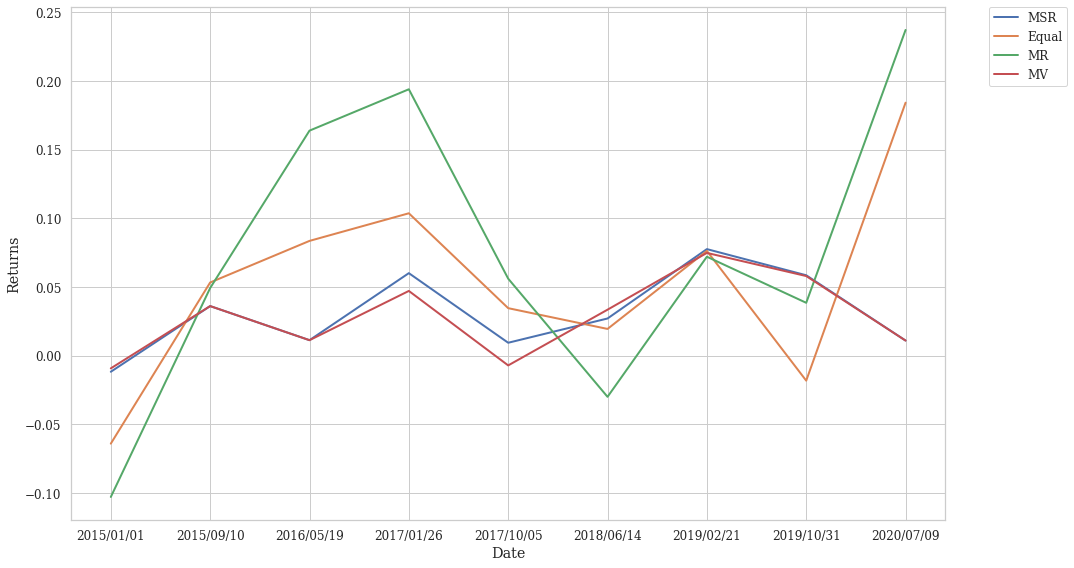

In [5]:
fig, ax = portfolio_backtest.plot_returns()

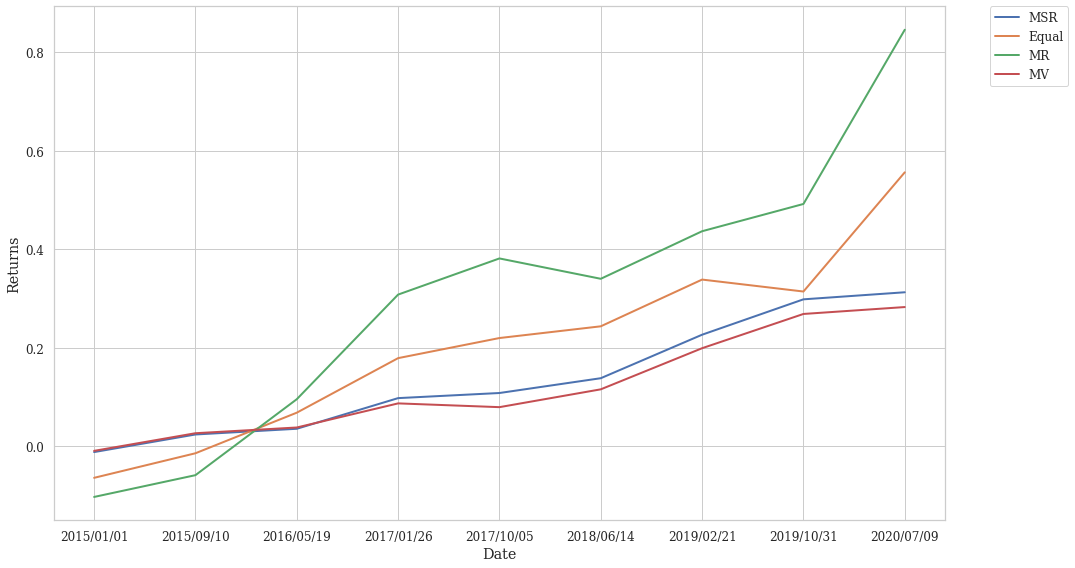

In [6]:
fig, ax = portfolio_backtest.plot_cum_returns()

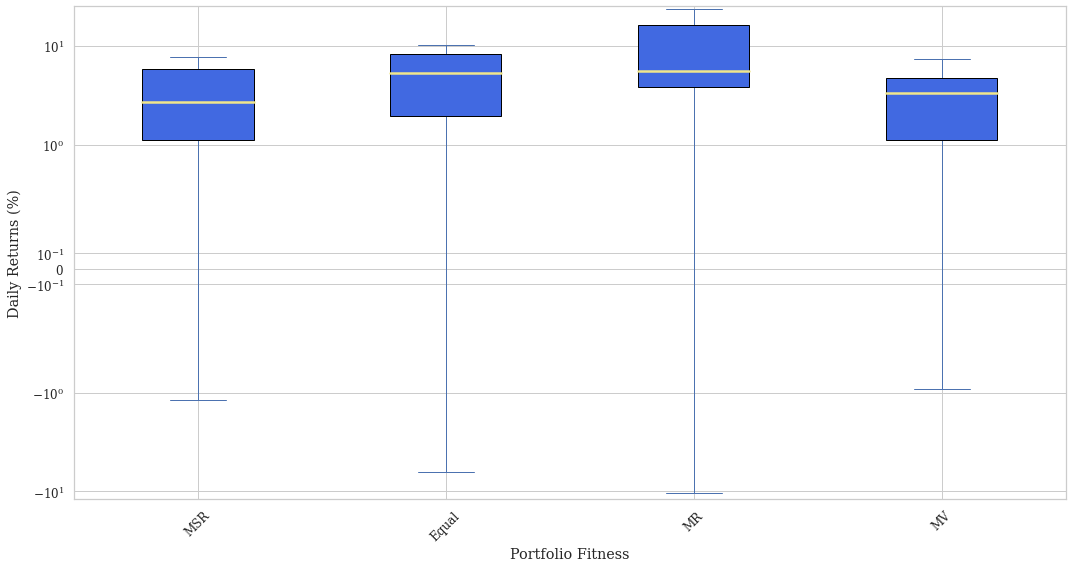

In [7]:
fig, ax = portfolio_backtest.plot_dist_returns()

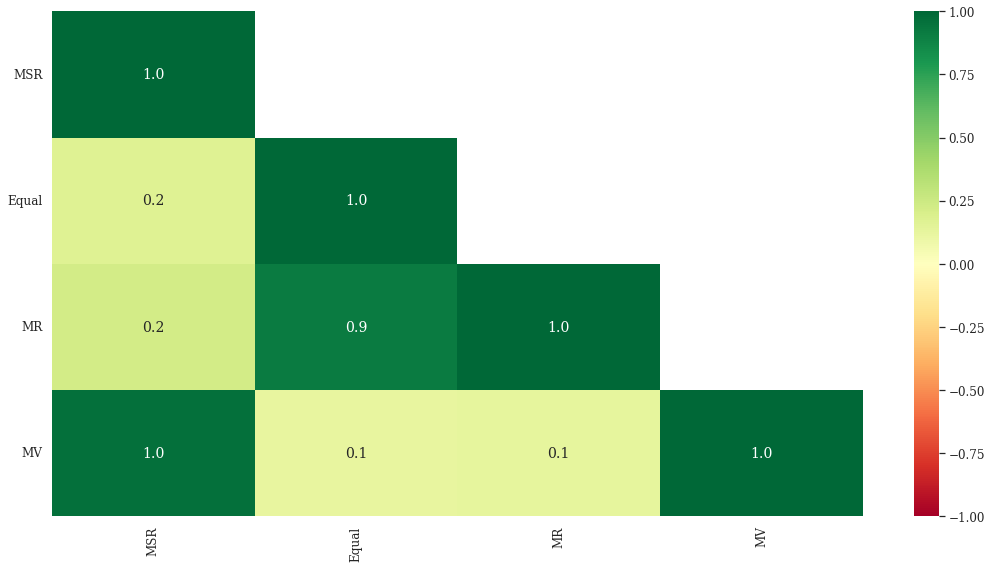

In [8]:
fig, ax = portfolio_backtest.plot_corr()

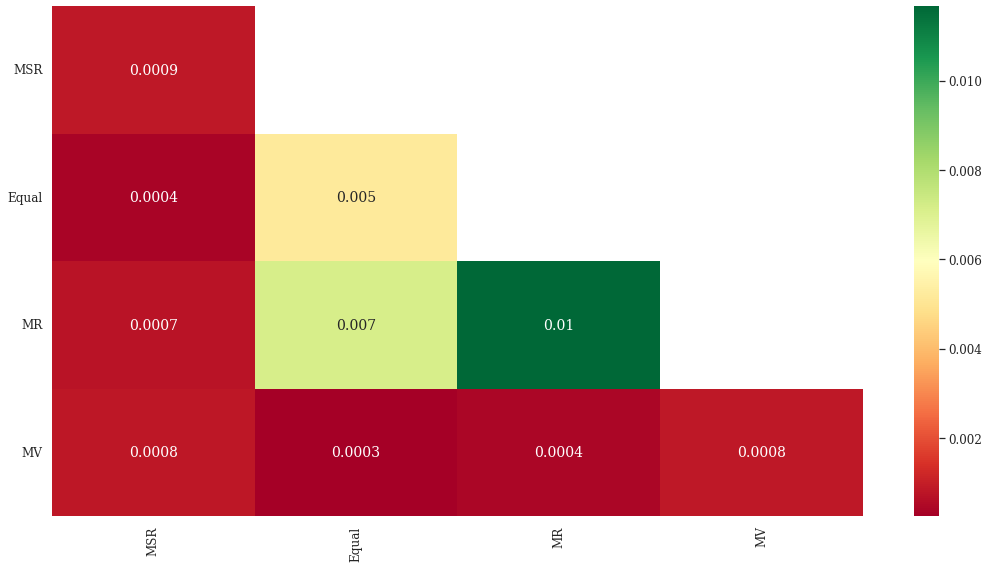

In [9]:
fig, ax = portfolio_backtest.plot_cov()

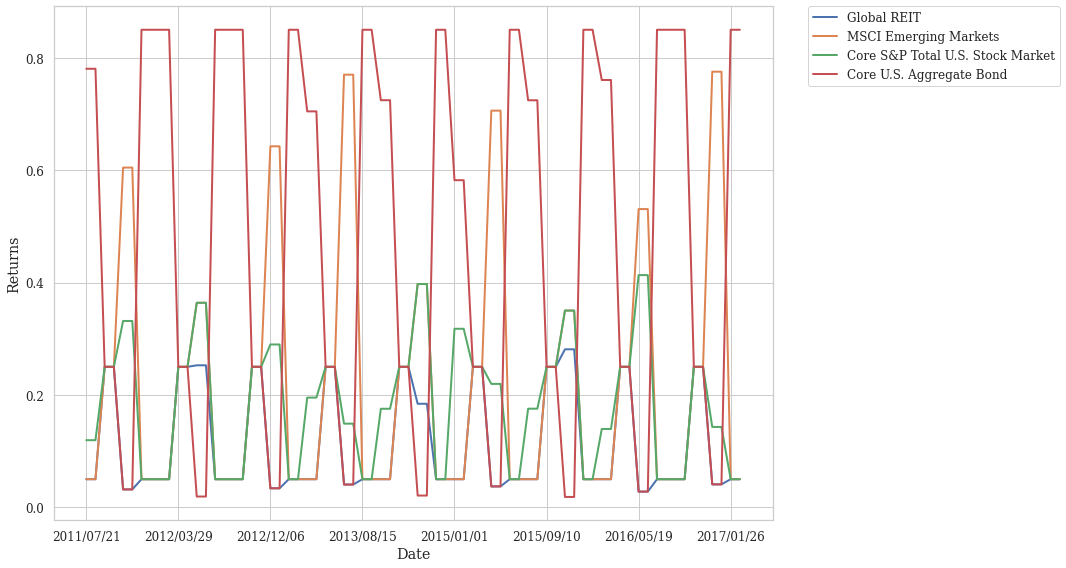

In [10]:
fig, ax = portfolio_backtest.plot_asset_weights()

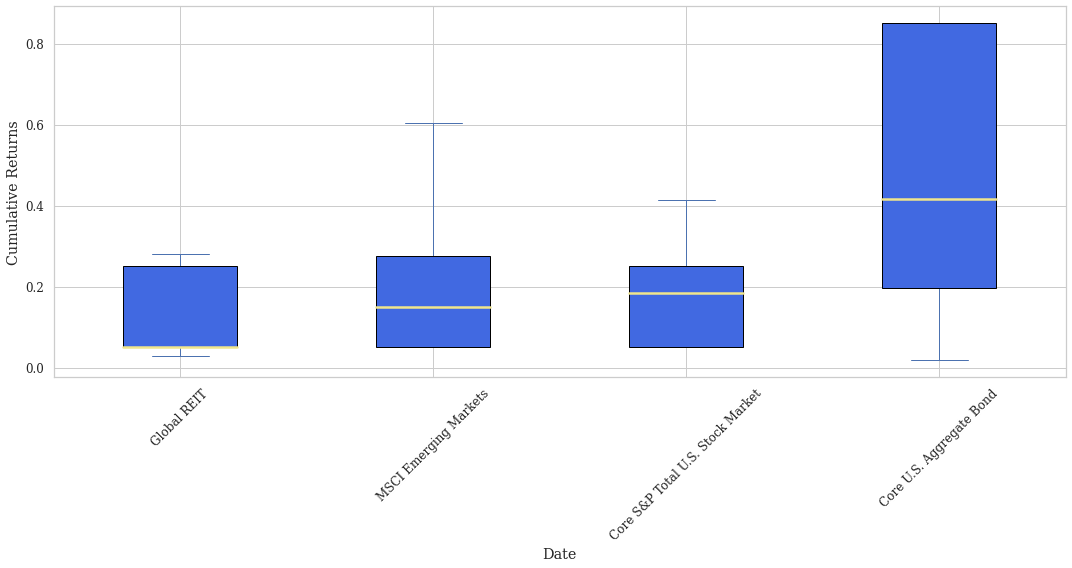

In [11]:
fig, ax = portfolio_backtest.plot_asset_weights_dist()

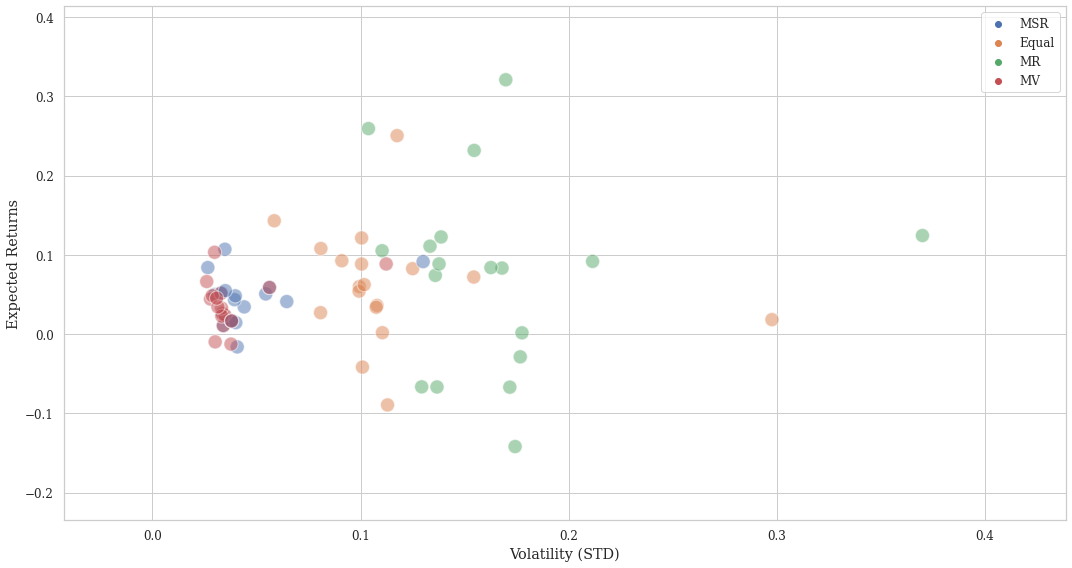

In [12]:
fig, ax = portfolio_backtest.plot_mean_std()